In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
salary_data = pd.read_csv('Salary_Data.csv')

In [6]:
type(salary_data)

pandas.core.frame.DataFrame

In [8]:
salary_data.shape

(30, 2)

In [10]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [14]:
salary_data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

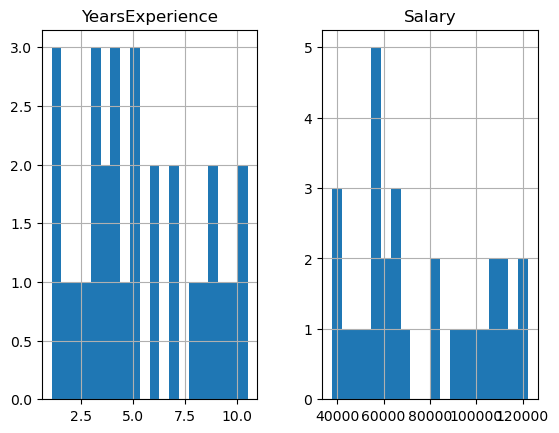

In [16]:
salary_data.hist(bins=20)

<Axes: >

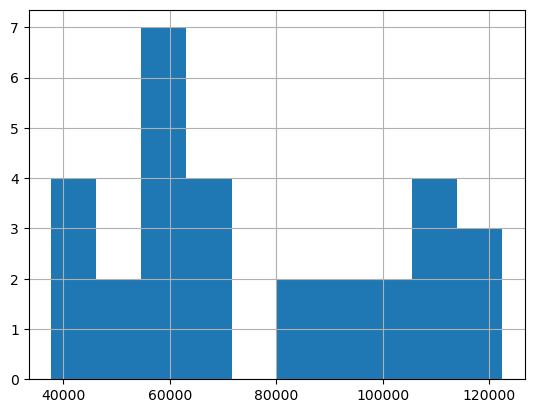

In [17]:
salary_data["Salary"].hist()

<Axes: >

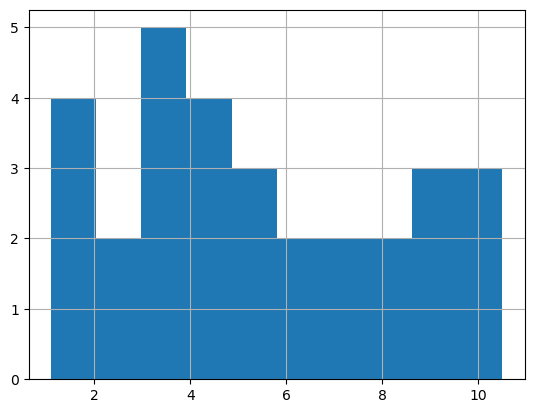

In [18]:
salary_data.YearsExperience.hist()

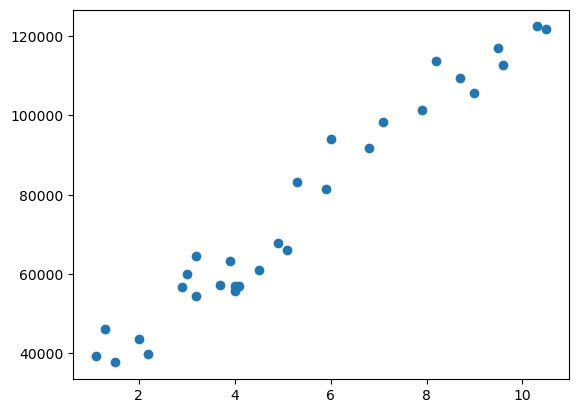

In [20]:
plt.scatter(salary_data.YearsExperience, salary_data.Salary)

In [23]:
salary_data.corr(method='pearson')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [26]:
salary_data.corr(method='spearman')

,YearsExperience,Salary
YearsExperience,1.000000,0.956831
Salary,0.956831,1.000000


In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
x=salary_data.iloc[:,0:1]
y=salary_data.iloc[:,1]

In [32]:
x.head(5)

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [34]:
y.head(5)

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [36]:
model2 = LinearRegression()

In [38]:
model2 = LinearRegression().fit(x, y)

In [40]:
r_sq = model2.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9569566641435086


In [42]:
print('intercept:', model2.intercept_)

intercept: 25792.20019866871


In [44]:
print('slope:', model2.coef_)

slope: [9449.96232146]


In [46]:
model2 = LinearRegression().fit(x, y)
y_pred2 = model2.predict(x)
print(y_pred2)

[ 36187.15875227  38077.15121656  39967.14368085  44692.12484158
  46582.11730587  53197.09093089  54142.08716303  56032.07962732
  56032.07962732  60757.06078805  62647.05325234  63592.04948449
  63592.04948449  64537.04571663  68317.03064522  72097.0155738
  73987.00803809  75877.00050238  81546.97789525  82491.9741274
  90051.94398456  92886.932681   100446.90253816 103281.8912346
 108006.87239533 110841.86109176 115566.84225249 116511.83848464
 123126.81210966 125016.80457395]


In [48]:
y_pred2.reshape(30,1)

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [50]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y, y_pred2)
mse = metrics.mean_squared_error(y, y_pred2)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,y_pred2)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 4644.2012894435375
MSE: 31270951.722280968
RMSE: 5592.043608760662
R-Squared: 0.9569566641435086


Text(0, 0.5, 'Salary')

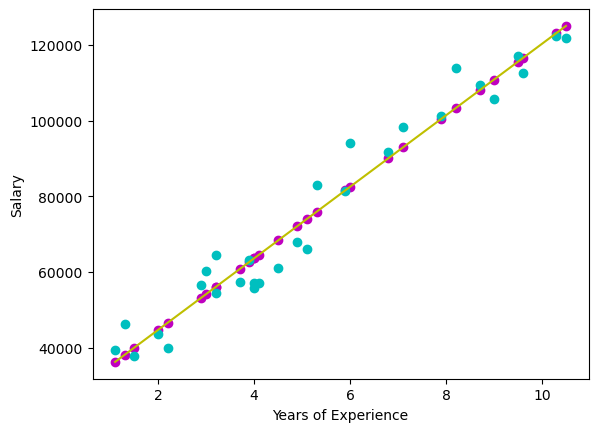

In [43]:
intercept = model2.intercept_
slope = model2.coef_

plt.scatter(x, y_pred2, color='m')
plt.scatter(x, y, color='c')

plt.plot(x, y_pred2, color='y')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

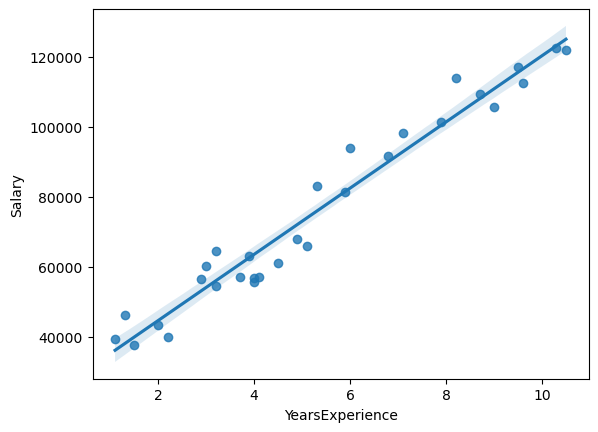

In [45]:
sns.regplot(x='YearsExperience', y='Salary', data=salary_data)